In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Data preparation

In [69]:
X,Y = make_blobs(n_samples=500,n_features=2,centers=5)

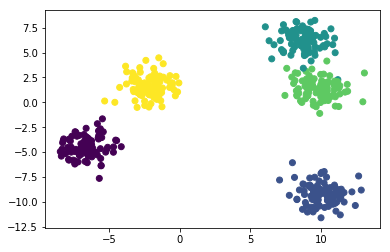

In [70]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## Initialization

In [71]:
k=5    

color = ['green','red','blue','yellow','orange']

clusters = {}

for i in range(k):
    center = 10*(np.random.random((X.shape[1],)))
    points = []
    
    cluster = {
        'center': center,
        'points': points,
        'color': color[i]
    }
    
    clusters[i] = cluster

## Helper functions

In [80]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

def plotClusters(clusters):
    
    for kx in range(k):
        
        pts = np.array(clusters[kx]['points'])
        
        # Plot the points
        try:
            plt.scatter(pts[:,0],pts[:,1],c=clusters[kx]['color'])
        except:
            pass
        
        # Plot the cluster center 
        uk = clusters[kx]['center']
        plt.scatter(uk[0],uk[1],c='black')
    plt.show()

## E - Step

In [35]:
def assignPointToClusters(X,clusters): # E-Step -> Populate points in each cluster
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]
    
        for kx in range(k):
            d = distance(curr_x,clusters[kx]['center'])
            dist.append(d)
        
        current_cluster = np.argmin(dist)
    
        clusters[current_cluster]['points'].append(curr_x)

## M - Step

In [36]:
def updateClusters(clusters): # M-Step -> We update every cluster center according to the mean
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if pts.shape[0]>0: # If a cluster has non zero points
            new_u = pts.mean(axis=0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = [] # Clear the list

## Learning

In [39]:
def fit(X,maxItr=5):
    
    for i in range(maxItr):
        assignPointToClusters(X,clusters)
        updateClusters(clusters)
    
    assignPointToClusters(X,clusters)
    plotClusters(clusters)

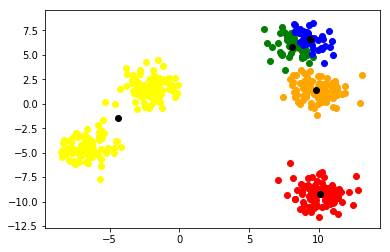

In [81]:
fit(X)

## kmeans++ using sklearn

In [45]:
from sklearn.cluster import KMeans

In [73]:
kmeans = KMeans(n_clusters=5)

In [74]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [75]:
Ypred = kmeans.labels_
centers = kmeans.cluster_centers_

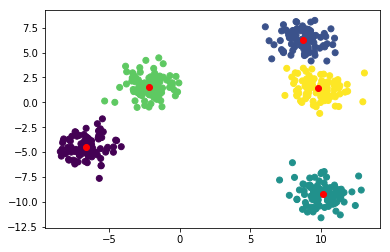

In [77]:
# As shown in the plot kmeans++ works better than random initialization

plt.scatter(X[:,0],X[:,1],c=Ypred)
plt.scatter(centers[:,0],centers[:,1],c='red')
plt.show()